# Predicting Used Car Prices

## About Dataset 

`used_cars.csv` dataset was taken from Auto Trader website.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set()

## Load Data

In [2]:
# Loading data from csv file and exploring it
data = pd.read_csv("used_cars.csv")
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Descriptive Statistics

In [3]:
# Explore dataset by including categorical and numerical variables
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Data Preprocessing 

### Determine Variables of Interest

Since there are unique 312 models we would need over 300 dummy variables. A lot of information from `Model` could be engineered from other features like `EngineV`, `Brand`, `Year` so dropping `Model` variable would not affect too much variabitility.

In [4]:
data1 = data.drop("Model", axis=1)
data1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with Missing Values 

In [5]:
# Find number of missing values
data1.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Since it is less than 5% of the data we can remove these missing values.

In [6]:
data2 = data1.dropna(axis=0)
data2.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring PDFs

Looking at probability distribution functions (PDFs) of variables we can easily spot anomalies like outliers.

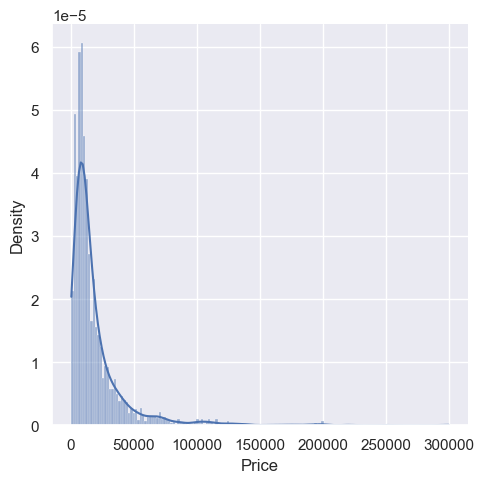

In [7]:
sns.displot(data2["Price"], kde=True, stat="density")

### Dealing with Outliers

It's evident that outliers exist in the `Price` variable, and their presence can significantly skew the results of regression analysis. One approach to mitigate their impact is to remove the top 1% of observations. This strategy is particularly relevant in the context of predicting used car prices, where excessively high prices may not align with the typical market values and could distort the predictive model. By excluding these extreme values, the regression model can focus on capturing the underlying patterns and relationships among the majority of the data points, thus leading to more accurate predictions for typical market scenarios.

In [8]:
data3 = data2[data2["Price"] < data2["Price"].quantile(0.99)]
data3.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


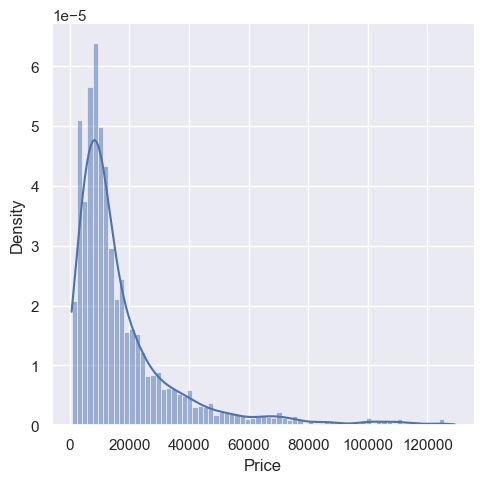

In [9]:
# Check the PDF again
sns.displot(data3["Price"], kde=True, stat="density")

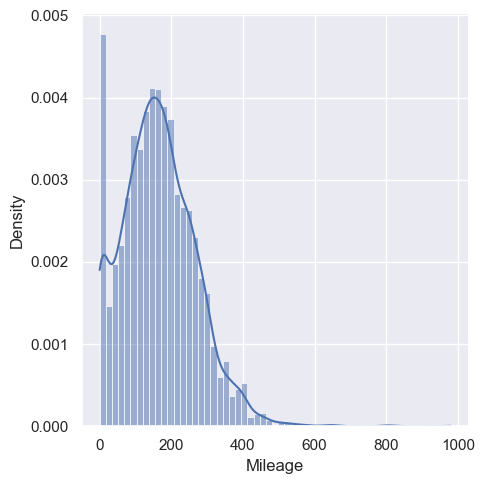

In [10]:
# Treat other numerical variables in a similar way
sns.displot(data3["Mileage"], kde=True, stat="density")

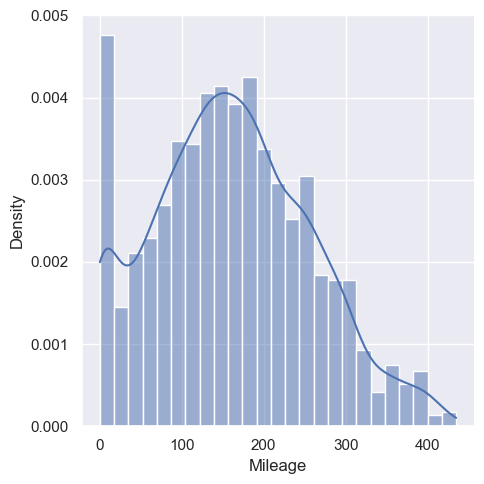

In [11]:
# Similar to Price variable remove 1% of top Mileage variable
data4 = data3[data3["Mileage"] < data3["Mileage"].quantile(0.99)]
sns.displot(data4["Mileage"], kde=True, stat="density")

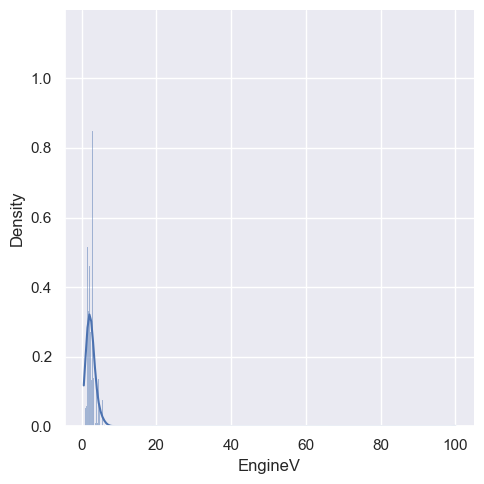

In [12]:
# Explore Engine volume variable.
sns.displot(data4["EngineV"], kde=True, stat="density")

Checking [online](https://en.wikipedia.org/wiki/Engine_displacement) it seems that engine volumes are typically between 0.6 and 6.5. Therefore, higher values can be removed.

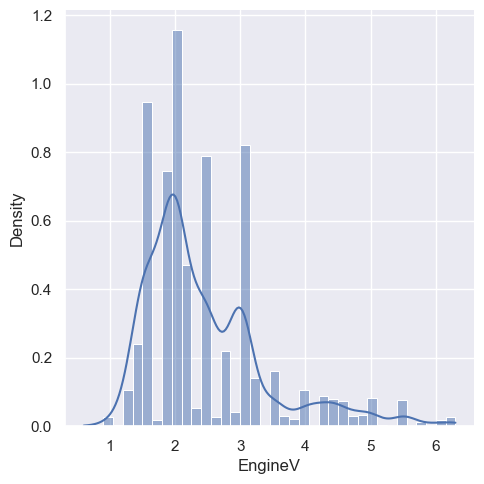

In [13]:
data5 = data4[data4["EngineV"] < 6.5]
sns.displot(data5["EngineV"], kde=True, stat="density")

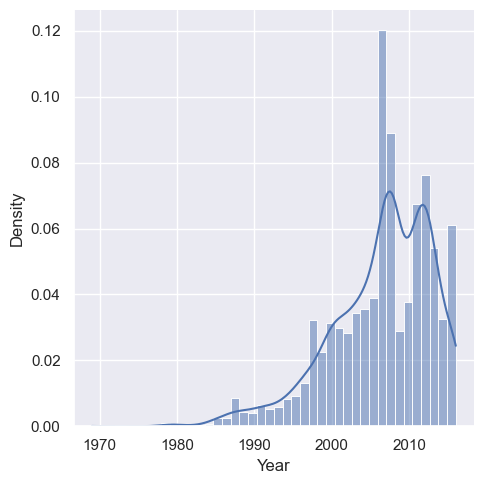

In [14]:
# Look at the Year variable.
sns.displot(data5["Year"], kde=True, stat="density")

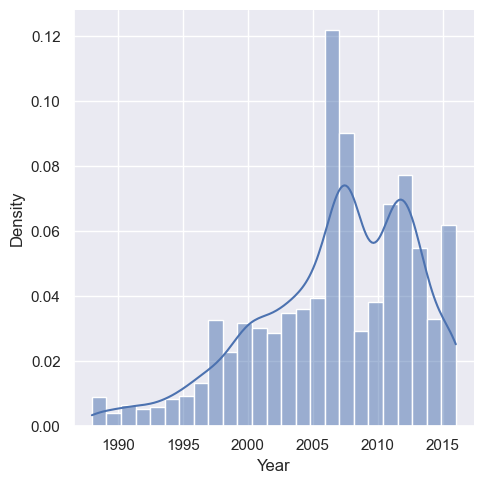

In [15]:
# This variable has outliers on the low end. This will also be removed.
data6 = data5[data5["Year"] > data5["Year"].quantile(0.01)]
sns.displot(data6["Year"], kde=True, stat="density")

In [16]:
# Finally, we reset index.
data_cleaned = data6.reset_index(drop=True)
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS Assumptions

### Linearity

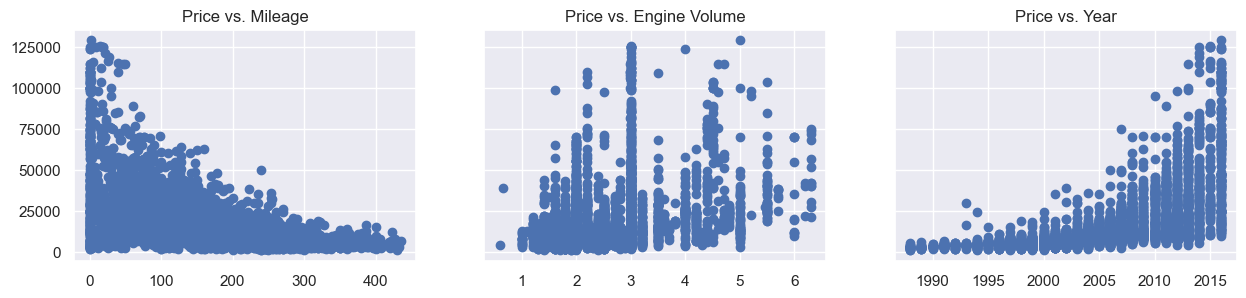

In [17]:
# Compare plots of Price vs Mileage, EngineV, and Year
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax1.set_title("Price vs. Mileage")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax2.set_title("Price vs. Engine Volume")
ax3.scatter(data_cleaned["Year"], data_cleaned["Price"])
ax3.set_title("Price vs. Year")
plt.show()

Graphs show that data is not linear but rather exponential. This can be seen from the price PDF as well where data is exponentially distributed.Therefore, data should be transformed and a good choice would be log transformation.

In [18]:
# Log transformation of Price variable
log_price = np.log(data_cleaned["Price"])

# Add log_price to a new column
data_cleaned["Log_price"] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


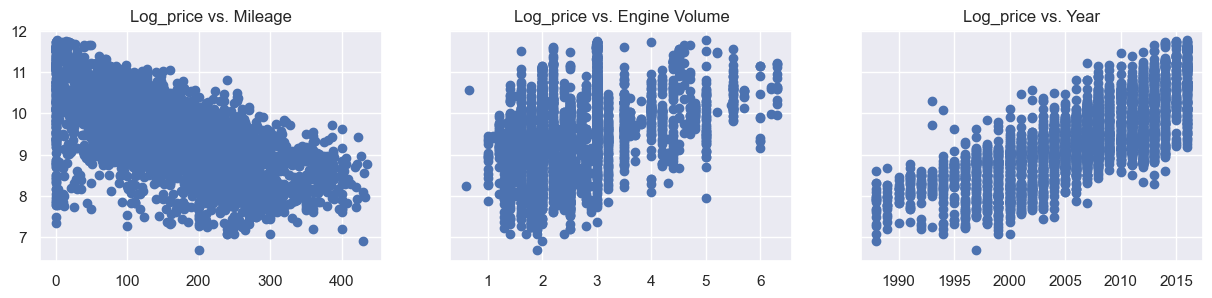

In [19]:
# Check plots again using Log_price
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned["Mileage"], data_cleaned["Log_price"])
ax1.set_title("Log_price vs. Mileage")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Log_price"])
ax2.set_title("Log_price vs. Engine Volume")
ax3.scatter(data_cleaned["Year"], data_cleaned["Log_price"])
ax3.set_title("Log_price vs. Year")
plt.show()

Resulting graphs show that data is linear, and therefore, we can use log transformed price instead of the Price variable.

In [20]:
# The Price column can be removed
data_cleaned = data_cleaned.drop("Price", axis=1)

### Multicollinearity

To check the multicollinearity refer to [this documentation](https://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor) that is explaining variance inflation factor from the statsmodels library.

In [21]:
# Import variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a variable that will contain all the features that should be examined for multicollinearity.
variables = data_cleaned[["Mileage", "EngineV", "Year"]]

# Create a new data frame that will include all variance inflation factors (VIFs)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


If VIF = 1 then there is no multicollinearity, if it is 1 < VIF < 5 it is acceptable. There is currently no consensus on unacceptable condition. It can be larger than 5 or sometimes larger than 10. In any case the feature `Year` has large VIF value and it should be removed from the model.

In [22]:
data_no_multicollinearity = data_cleaned.drop("Year", axis=1)

In [23]:
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


## Preprocessing Categorical Features

### Create Dummy Variables

In [24]:
# To avoid introducting multicollinearity one of the dummies should be removed.
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True, dtype=int)

In [25]:
data_with_dummies.head()

,Mileage,EngineV,Log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


All categorical features `Brand`, `Body`, `Engine Type`, `Registration` have been replaced with dummies.

### VIF of the Features Including the Dummies

In [26]:
# Variance inflation factor for all variables including dummies and dependent variable
variables_dummies = data_with_dummies[data_with_dummies.columns]
vif_dummies = pd.DataFrame()
vif_dummies["VIF"] = [variance_inflation_factor(variables_dummies.values, i) for i in range(variables_dummies.shape[1])]
vif_dummies["Features"] = variables_dummies.columns
vif_dummies

,VIF,Features
0,4.460434,Mileage
1,13.445639,EngineV
2,41.981260,Log_price
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


Variance inflation factor (VIF) for `Log_price`is very high which makes sense because that is a dependent variable and the multicollinearity assumption refers only to the idea that the independent variables shoud not be collinear.

In [27]:
cols = ['Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [28]:
# Variance inflation factor for all variables including dummies but excluded dependent variable
variables_dummies = data_with_dummies[cols]
vif_dummies = pd.DataFrame()
vif_dummies["VIF"] = [variance_inflation_factor(variables_dummies.values, i) for i in range(variables_dummies.shape[1])]
vif_dummies["Features"] = variables_dummies.columns
vif_dummies

,VIF,Features
0,4.459662,Mileage
1,7.841729,EngineV
2,2.294007,Brand_BMW
3,2.868649,Brand_Mercedes-Benz
4,1.641712,Brand_Mitsubishi
5,2.086774,Brand_Renault
6,2.162166,Brand_Toyota
7,2.844515,Brand_Volkswagen
8,1.464260,Body_hatch
9,1.534059,Body_other


Almost all VIFs are pretty much acceptable. The ones that are high are `EngineV` and `Registration_yes`.

In [29]:
# Find VIFs for a data frame that includes the dummies, without 'log_price', and include the first dummy.
data_with_all_dummies = pd.get_dummies(data_no_multicollinearity, dtype=int)
data_with_all_dummies.head()

,Mileage,EngineV,Log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,9.814656,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [30]:
data_with_all_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_price', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes'],
      dtype=object)

In [31]:
col = ['Mileage', 'EngineV', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes']
variables_all_dummies = data_with_all_dummies[col]
vif_all_dummies = pd.DataFrame()
vif_all_dummies["VIF"] = [variance_inflation_factor(variables_all_dummies.values, i) for i in range(variables_all_dummies.shape[1])]
vif_all_dummies["Features"] = variables_all_dummies.columns
vif_all_dummies

C:\Users\ttomk\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Features
0,1.266554,Mileage
1,1.575735,EngineV
2,inf,Brand_Audi
3,inf,Brand_BMW
4,inf,Brand_Mercedes-Benz
5,inf,Brand_Mitsubishi
6,inf,Brand_Renault
7,inf,Brand_Toyota
8,inf,Brand_Volkswagen
9,inf,Body_crossover


Most VIFs are equal to **inf**. When a car is an 'Audi' all other brand dummies are 0. When a car is not 'Audi', at least one of them will be 1. Including all dummies  multicollinearity is introduced (**perfect multicollinearity**)!

### Rearrange the DataFrame 

In [32]:
# Reorganize data to place the dependent variable in the beginning of the dataframe.
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [33]:
col_names = ['Log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [34]:
data_preprocessed = data_with_dummies[col_names]
data_preprocessed.head()

,Log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model 

In [35]:
# Log_price is a target variable and all others are inputs
targets = data_preprocessed["Log_price"]
inputs = data_preprocessed.drop("Log_price", axis=1)

In [36]:
# Scale the data. Test it on all data although it is advisable not to scale dummies
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [37]:
# Split the data using train_test_split method with an 80-20 split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [38]:
# Create a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [39]:
# Find model outputs
y_pred = lin_reg.predict(x_train)

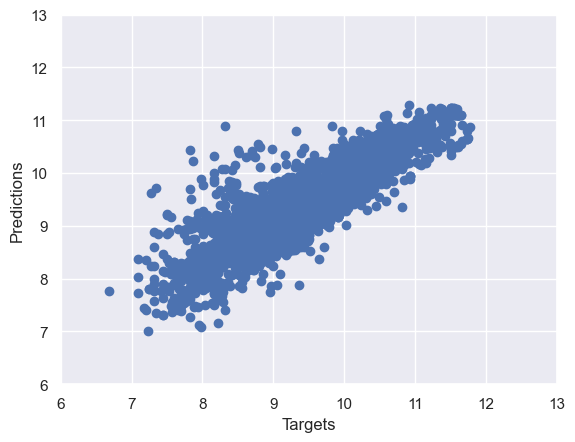

In [40]:
# Plot targets and outputs on the scatter plot. The closer the point to the 45-degree line, the better the prediction
plt.scatter(y_train, y_pred)
plt.xlabel("Targets", fontsize=12)
plt.ylabel("Predictions", fontsize=12)
# Make sure the x- and y-axis are the same to be able to interpret the 45-degree line
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

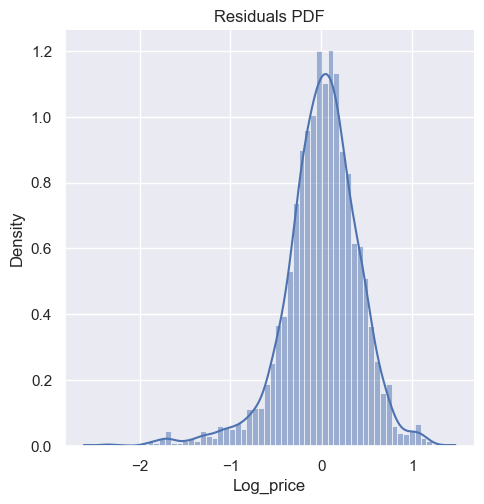

In [42]:
# PDF plot of the residuals to check anomalies
sns.displot(y_train - y_pred, kde=True, stat="density")
plt.title("Residuals PDF")
plt.show()

The plot is skewed to the left meaning there are more negative residuals that implies the predicted prices are higher than targets.

In [44]:
# Find the R-squared of the model
r2 = lin_reg.score(x_train, y_train)
r2

0.7546487921881218

In [46]:
# Find the adjusted R-squared
n = x_train.shape[0]
p = x_train.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adj_r2

0.7532923790067227

In [47]:
# Find the bias of the regression
lin_reg.intercept_

9.329486241384899

In [48]:
# Find the weights of the regression
lin_reg.coef_

array([-0.00489596,  0.22677863,  0.03004208,  0.01435863, -0.5309696 ,
       -0.59582381, -0.19494044, -0.23923816, -0.56539335, -0.31903244,
       -0.36874884, -0.38857226, -0.42984803, -0.33010138, -0.16286015,
       -0.31466867,  1.07941322])

In [49]:
# Create a regression summary
summary = pd.DataFrame({"Features": inputs.columns.values, "Weights": lin_reg.coef_})
summary

,Features,Weights
0,Mileage,-0.004896
1,EngineV,0.226779
2,Brand_BMW,0.030042
3,Brand_Mercedes-Benz,0.014359
4,Brand_Mitsubishi,-0.530970
5,Brand_Renault,-0.595824
6,Brand_Toyota,-0.194940
7,Brand_Volkswagen,-0.239238
8,Body_hatch,-0.565393
9,Body_other,-0.319032


In [50]:
# Check different categories in a Brand variable
data_cleaned["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

"Audi" is a benchmark `Brand` which is used to compare weights of other brands. This means that for BMW weights are positive so price of BMW is a bit higher than price of benchmark brand, i.e., Audi. On the other hand the weights for Toyota are negative meaning the price of Toyota is lower than price of Audi, etc.

In [52]:
# Find benchmarks for all other categorical variables
print(data_cleaned["Body"].unique())
print(data_cleaned["Engine Type"].unique())
print(data_cleaned["Registration"].unique())

['sedan' 'van' 'crossover' 'vagon' 'other' 'hatch']
['Petrol' 'Diesel' 'Gas' 'Other']
['yes' 'no']


Benchmarks for other categorical variables are as follows.
- `Body` feature -> **crossover**
- `Engine Type` feature -> **Diesel**
- `Registration` feature -> **no**

## Testing Model Performance

In [53]:
# Make predictions on x_test
y_test_pred = lin_reg.predict(x_test)

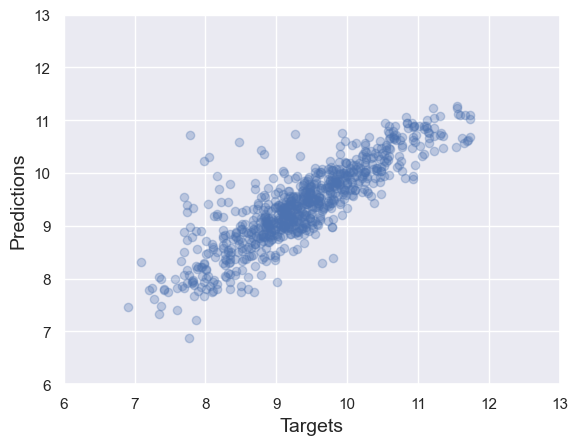

In [57]:
# Plot test targets and test predictions
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("Targets", fontsize=14)
plt.ylabel("Predictions", fontsize=14)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()